## Response和Signaling的散点图

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

celltype = 'B'
dataset = 'BRCA_GSE161529'
sample = ''

if celltype == 'CD8T':
    signature = 'Proliferation'
    celltype_in_column = 'CD8T'
    celltype_in_file = 'CD8T'
    response_path = f'/sibcb1/bioinformatics/hongyuyang/dataset/Tres/2.tisch_data/3-1.Proliferation/{dataset}.csv'
elif celltype == 'Macrophage':
    signature = 'SMART_C13'
    celltype_in_column = 'Mono/Macro'
    celltype_in_file = 'Mono_Macro'
    response_path = f'/sibcb1/bioinformatics/hongyuyang/dataset/Tres/2.tisch_data/3-2.Polarization/{dataset}.csv'
elif celltype == 'Neutrophils':
    # signature = 'Neutrophils_signature'
    signature = 'Neut_IFN-15'
    celltype_in_column = 'Neutrophils'
    celltype_in_file = 'Neutrophils'
    response_path = f'/sibcb1/bioinformatics/hongyuyang/dataset/Tres/2.tisch_data/3-3.Neutrophils_response/{sample}.csv'
elif celltype == 'NK':
    signature = 'NK_signature'
    celltype_in_column = 'NK'
    celltype_in_file = 'NK'
    response_path = f'/sibcb1/bioinformatics/hongyuyang/dataset/Tres/2.tisch_data/3-4.NK_response/{dataset}.csv'
elif celltype == 'NK_act':
    signature = 'NK_act_signature'
    celltype_in_column = 'NK'
    celltype_in_file = 'NK'
    response_path = f'/sibcb1/bioinformatics/hongyuyang/dataset/Tres/2.tisch_data/3-4-0.NK_act_response/{dataset}.csv'
elif celltype == 'B':
    signature = 'B_signature'
    celltype_in_column = 'B'
    celltype_in_file = 'B'
    response_path = f'/sibcb1/bioinformatics/hongyuyang/dataset/Tres/2.tisch_data/3-5.B_response/{dataset}.csv'
    
signaling_path = f'/sibcb1/bioinformatics/hongyuyang/dataset/Tres/2.tisch_data/2.Signaling/{dataset}.csv'
# signaling_path = '/sibcb1/bioinformatics/hongyuyang/dataset/Tres/2.neutrophil_data/Gao2024.signaling.csv'
signaling_data = pd.read_csv(signaling_path, delimiter='\t', index_col=0, header=0)
celltype_list = [v.split('.')[0] for v in signaling_data.columns]
celltype_flag = [v for v in signaling_data.columns if v.split('.')[0] == celltype_in_column]
signaling_data = signaling_data[celltype_flag]
response_data = pd.read_csv(response_path, delimiter='\t', index_col=0, header=0)

if sample != '':
    sample_flag = [v for v in response_data.columns if '.'.join(v.split('.')[:2]) == sample]
    signaling_data = signaling_data[sample_flag]
    sample_flag = [v for v in signaling_data.columns if '.'.join(v.split('.')[:2]) == sample]
    response_data = response_data[sample_flag]

signaling_data.shape, response_data.shape

((51, 5302), (2, 5302))

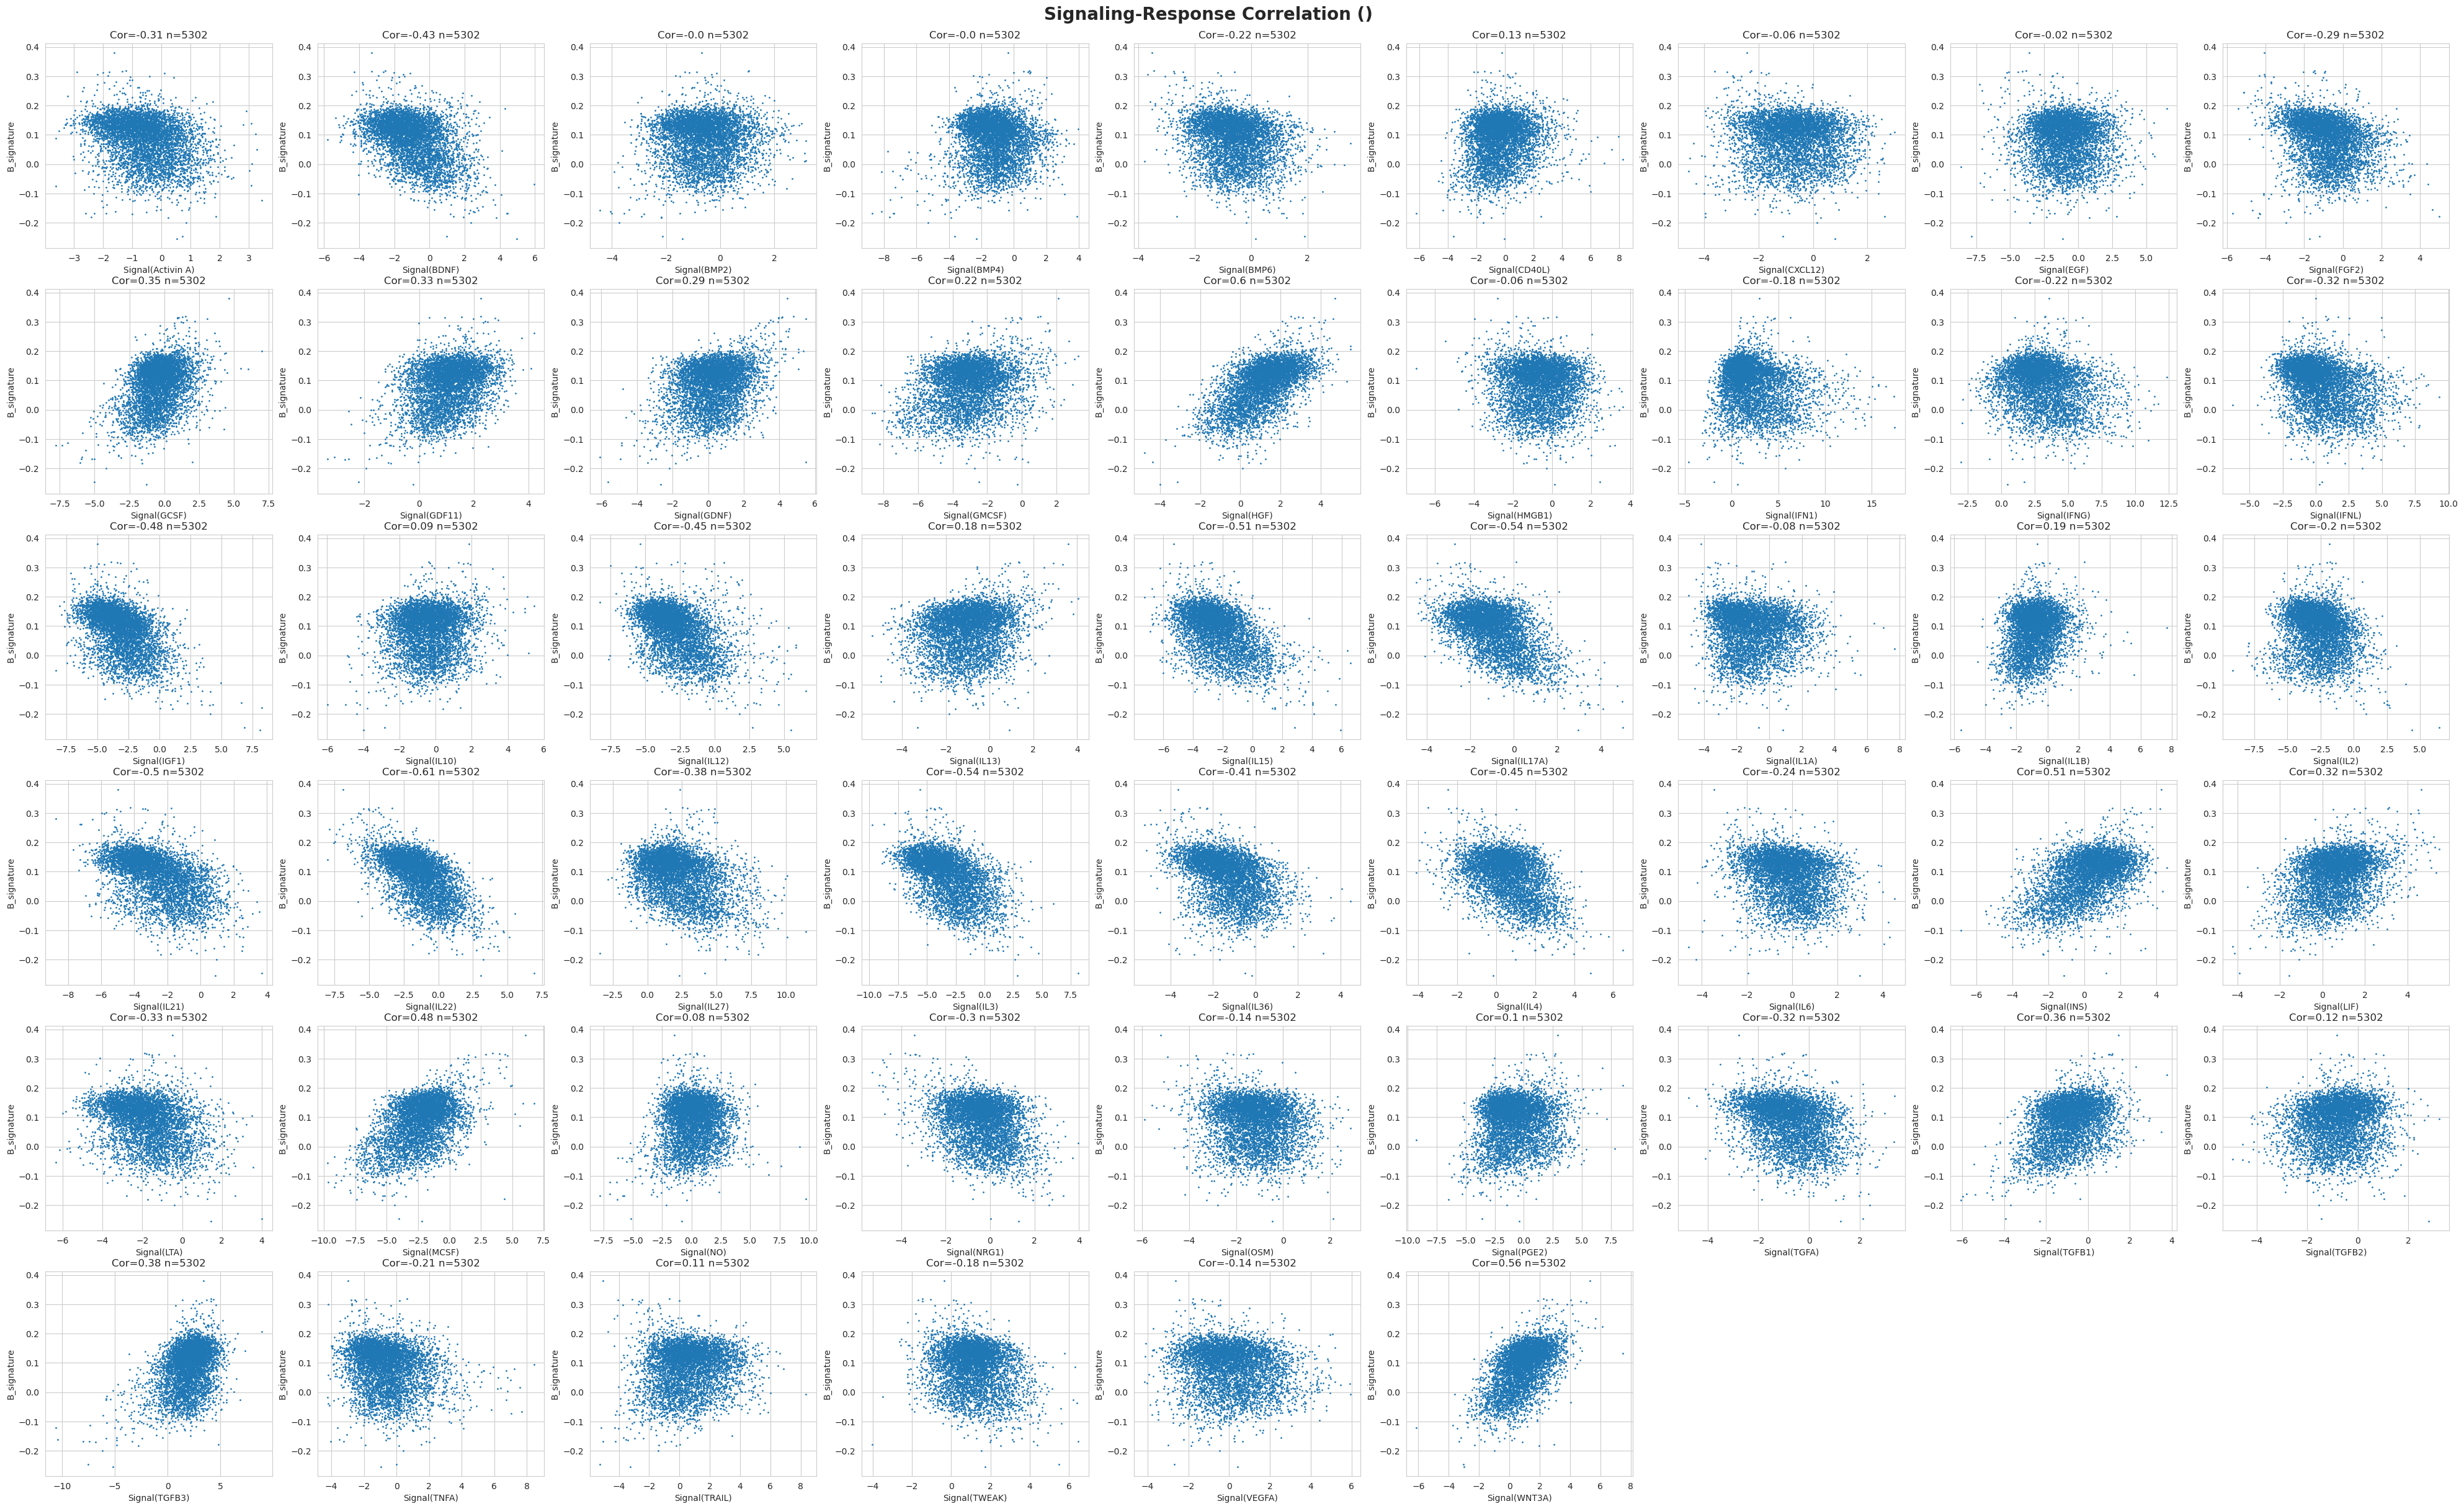

In [2]:
import matplotlib.gridspec as gridspec
from scipy.stats import pearsonr

fig = plt.figure(figsize=(50, 30))
ncols, nrows = 9, 6
gs = gridspec.GridSpec(nrows=nrows, ncols=ncols, width_ratios=[1] * ncols, height_ratios=[1] * nrows)

y = response_data.loc[signature]
i = 0
for cytokine in list(signaling_data.index):
    col = i % ncols
    row = int(i / ncols)
    ax = fig.add_subplot(gs[row, col])

    x = signaling_data.loc[cytokine]
    
    # x_normalized = (x - min(x)) / (max(x) - min(x))
    # y_normalized = (y - min(y)) / (max(y) - min(y))
    correlation, _ = pearsonr(x, y)
    
    ax.scatter(x, y, s=1)
    ax.set_xlabel(f'Signal({cytokine})')
    ax.set_ylabel(signature)
    ax.set_title(f'Cor={round(correlation, 2)} n={len(x)}')
    i += 1
fig.suptitle(f"Signaling-Response Correlation ({sample})", fontsize=20, fontweight='bold', y=0.9)
plt.show()

## Response和Signaling相关性系数总结

/var/tmp/ipykernel_7241/2969989615.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  histplot.set_yticklabels(histplot.get_yticks(), size = 15)


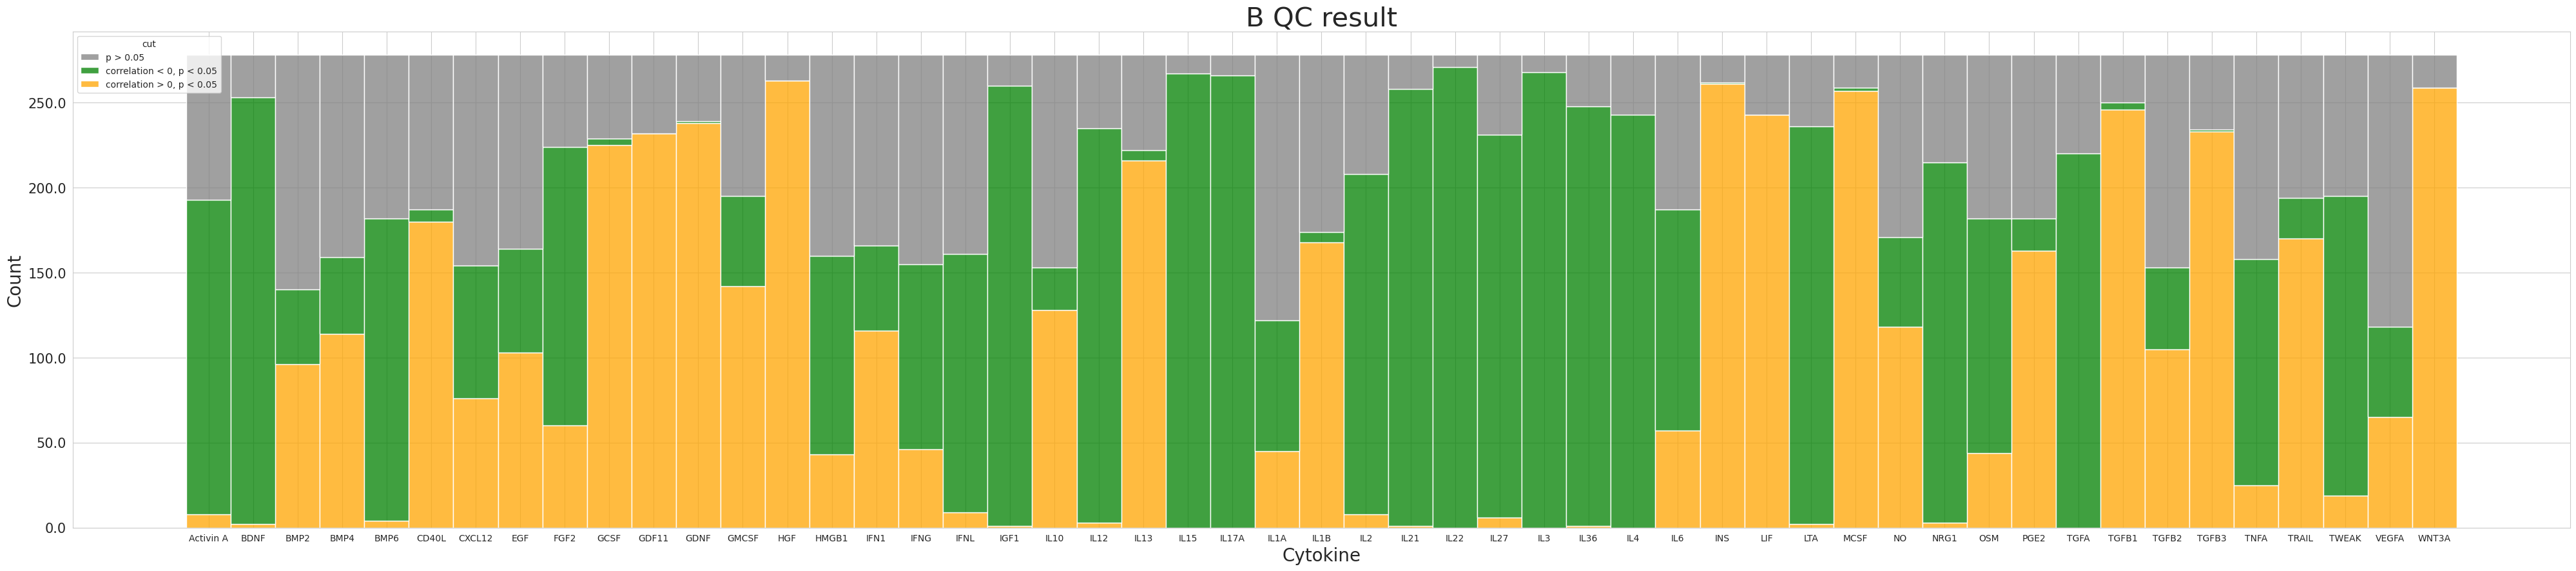

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# celltype_list = ['CD8T', 'Macrophage', 'Neutrophils', 'NK']
celltype_list = ['B']
fig = plt.figure(figsize=(50, 10 * len(celltype_list)))
gs = gridspec.GridSpec(nrows=len(celltype_list), ncols=1)

i = 0
for celltype in celltype_list:
    # if celltype == 'Neutrophils':
    #     qc_result_path = '/sibcb1/bioinformatics/hongyuyang/dataset/Tres/2.neutrophil_data/qc_result.Neutrophils.csv'
    # else:
    qc_result_path = f'/sibcb1/bioinformatics/hongyuyang/dataset/Tres/2.tisch_data/4.qc_result/qc_result_correlation.{celltype}.csv'
    qc_result_data = pd.read_csv(qc_result_path, sep="\t", header=0)
    
    cutoff = 0
    positive_str = f"correlation > {cutoff}, p < 0.05"
    negative_str = f"correlation < {cutoff * -1}, p < 0.05"
    unvalid_str = "p > 0.05"
    def get_group(x):
        if x.correlation >= cutoff and x.p <= 0.05:
            return positive_str
        elif x.correlation <= (cutoff * -1) and x.p <= 0.05:
            return negative_str
        elif x.p > 0.05:
            return unvalid_str
    qc_result_data['cut'] = qc_result_data.apply(lambda x: get_group(x), axis=1)
    
    def get_group2(x):
        if x.correlation >= cutoff and x.p <= 0.05:
            return 0
        elif x.correlation <= (cutoff * -1) and x.p <= 0.05:
            return 1
        elif x.p > 0.05:
            return -1

    qc_result_data['negative_rate'] = qc_result_data.apply(lambda x: get_group2(x), axis=1)
    qc_result_filtered = qc_result_data[qc_result_data['negative_rate'] >= 0]
    negative_rate = qc_result_filtered.groupby('Cytokine')['negative_rate'].mean()
    negative_rate.sort_values(ascending=False, inplace=True)
    negative_rate.to_csv(f"/sibcb1/bioinformatics/hongyuyang/dataset/Tres/2.tisch_data/4.qc_result/Rank_new.{celltype}.csv")
    
    ax = fig.add_subplot(gs[i, 0])
    histplot = sns.histplot(data=qc_result_data, x="Cytokine", hue="cut", multiple="stack", hue_order=[unvalid_str, negative_str, positive_str], 
                            palette={positive_str:'orange', negative_str:'green', unvalid_str:'grey'})
    histplot.xaxis.label.set_size(20)
    histplot.yaxis.label.set_size(20)
    histplot.set_yticklabels(histplot.get_yticks(), size = 15)
    histplot.set_title(f"{celltype} QC result", size = 30)
    i += 1
plt.show()

In [4]:
negative_rate

Cytokine
IL3          1.000000
IL17A        1.000000
IL15         1.000000
IL22         1.000000
IL4          1.000000
TGFA         1.000000
IGF1         0.996154
IL21         0.996124
IL36         0.995968
BDNF         0.992095
LTA          0.991525
IL12         0.987234
NRG1         0.986047
BMP6         0.978022
IL27         0.974026
IL2          0.961538
Activin A    0.958549
IFNL         0.944099
TWEAK        0.902564
TNFA         0.841772
OSM          0.758242
FGF2         0.732143
HMGB1        0.731250
IFNG         0.703226
IL6          0.695187
IL1A         0.631148
CXCL12       0.506494
VEGFA        0.449153
EGF          0.371951
BMP2         0.314286
TGFB2        0.313725
NO           0.309942
IFN1         0.301205
BMP4         0.283019
GMCSF        0.271795
IL10         0.163399
TRAIL        0.123711
PGE2         0.104396
CD40L        0.037433
IL1B         0.034483
IL13         0.027027
GCSF         0.017467
TGFB1        0.016000
MCSF         0.007722
TGFB3        0.004274
G

ValueError: The palette dictionary is missing keys: {'correlation < -0.3, p < 0.05', 'correlation > 0.3, p < 0.05'}

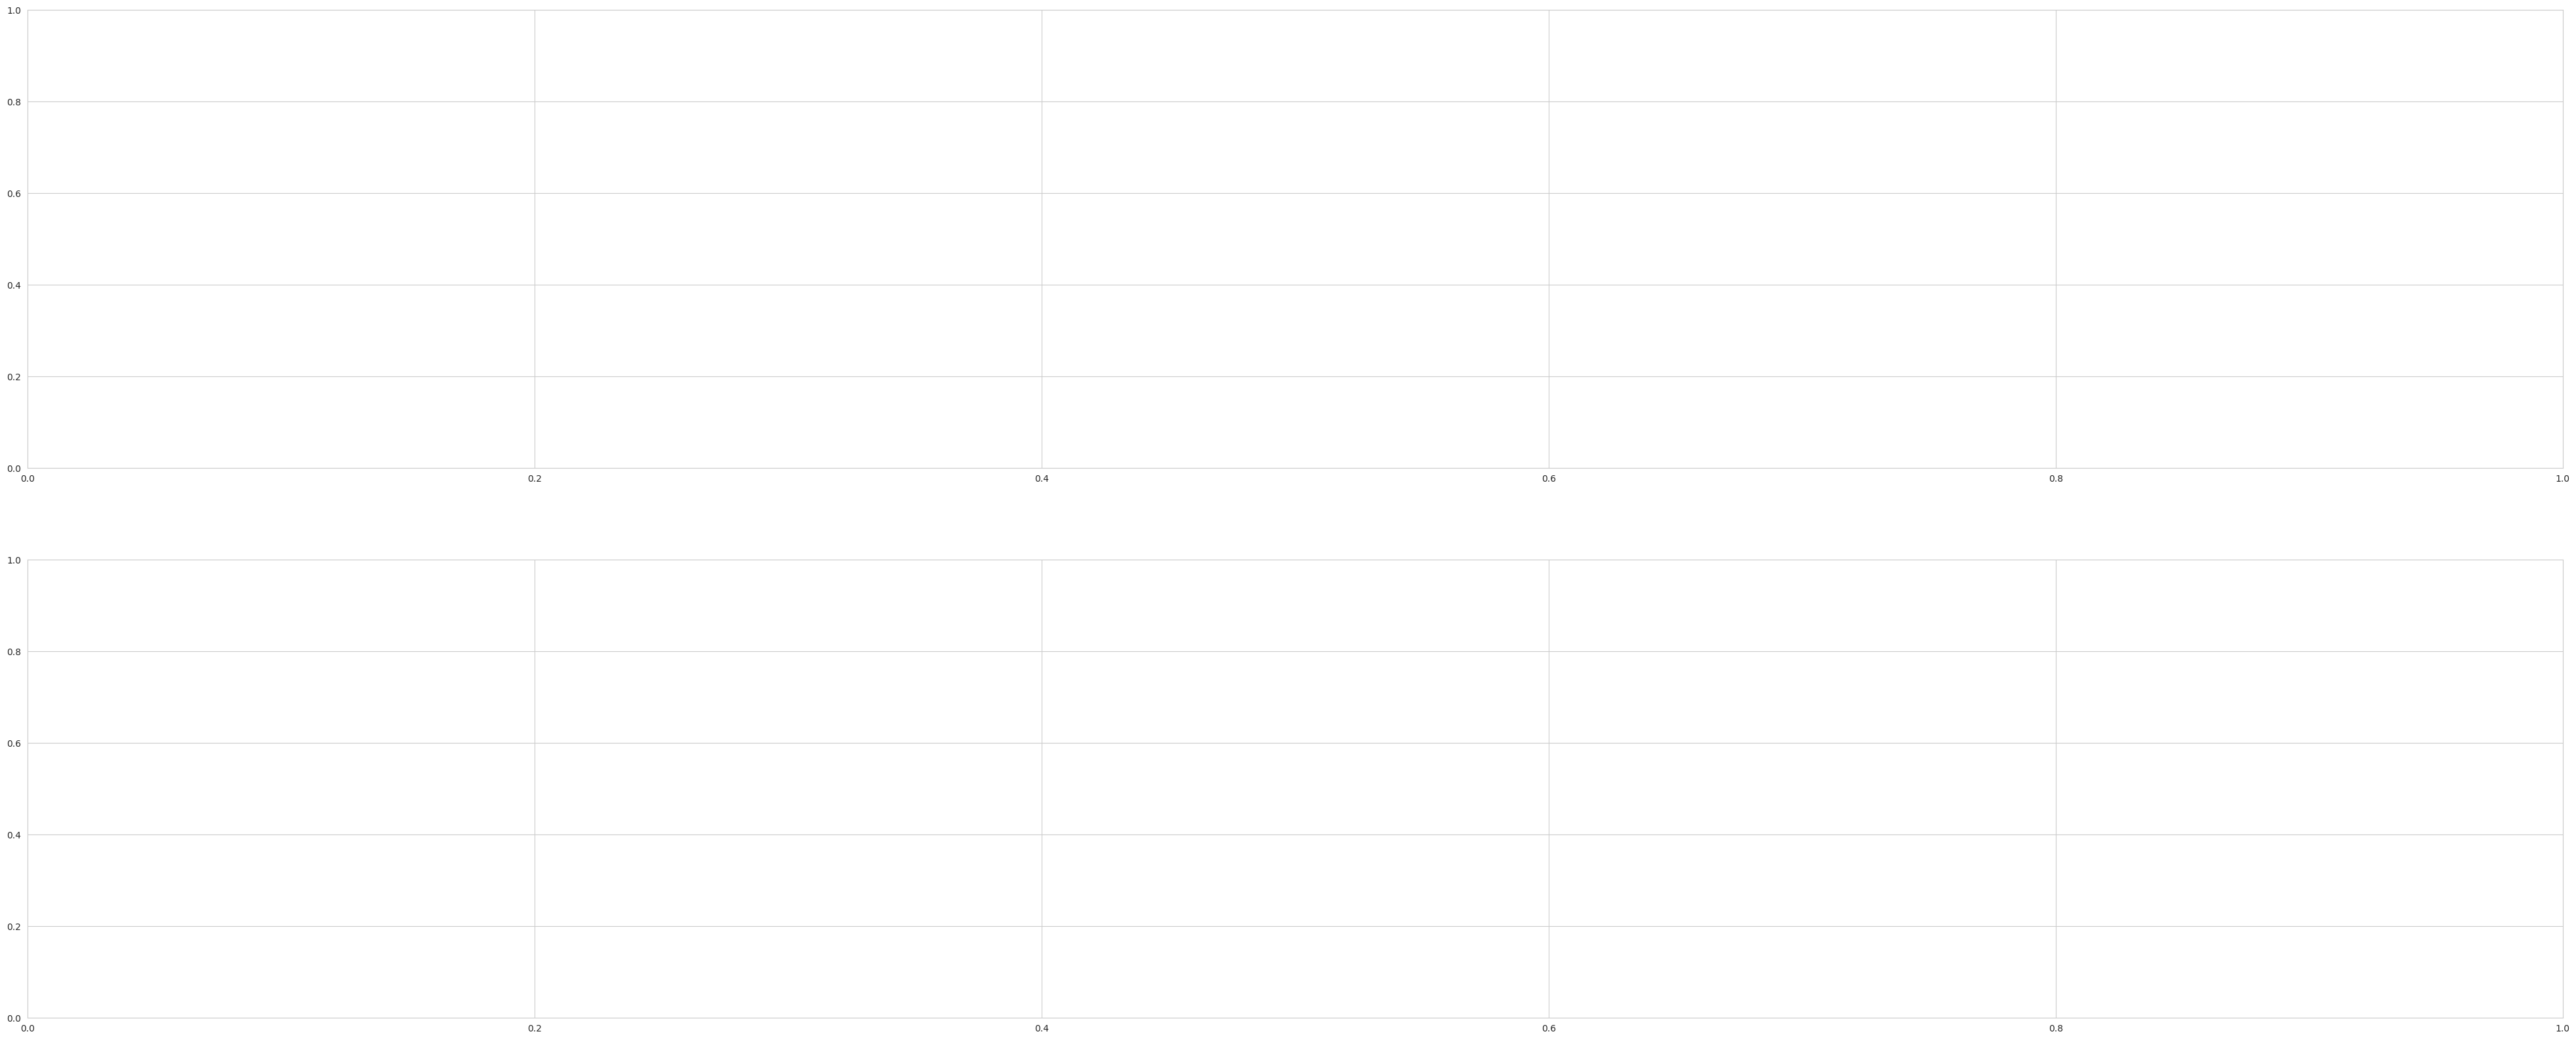

In [76]:
# 加上散点图
fig, axes = plt.subplots(2, 1, figsize=(50, 20))
sns.histplot(data=qc_result_data, x="Cytokine", hue="cut", multiple="stack", ax=axes[0], 
            palette={'t > 0, p < 0.05':'orange', 't < 0, p < 0.05':'green', 'p > 0.05':'grey'})
axes[0].set_title(f"{celltype} Response-Signaling t-value rate", size=30)
# qc_result_data_filtered = qc_result_data[qc_result_data['p'] <= 0.05]
sns.violinplot(x="Cytokine", y="t", data=qc_result_data, ax=axes[1])
sns.stripplot(x="Cytokine", y="t", data=qc_result_data, color='b', size=1, ax=axes[1])
axes[1].axhline(0, color='grey', linestyle='--', linewidth=2)
axes[1].set_title(f"{celltype} Response-Signaling t-value distribution (p < 0.05)", size=30)
plt.show()

## CD8T两个数据集结果汇总

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy

celltype = 'CD8T'
qc_result_path1 = '/sibcb1/bioinformatics/hongyuyang/dataset/Tres/1.paper_data/3.qc_result/qc_result.CD8T.csv'
qc_result_path2 = '/sibcb1/bioinformatics/hongyuyang/dataset/Tres/2.tisch_data/4.qc_result/qc_result.CD8T.csv'
qc_result_data1 = pd.read_csv(qc_result_path1, sep="\t", header=0)
qc_result_data2 = pd.read_csv(qc_result_path2, sep="\t", header=0)

def get_group(x):
    if x.t >= 0 and x.p <= 0.05:
        return 0
    elif x.t <= 0 and x.p <= 0.05:
        return 1
    elif x.p > 0.05:
        return -1

qc_result_data1['cut'] = qc_result_data1.apply(lambda x: get_group(x), axis=1)
qc_result_data2['cut'] = qc_result_data2.apply(lambda x: get_group(x), axis=1)
qc_result_filtered1 = qc_result_data1[qc_result_data1['cut'] >= 0]
qc_result_filtered2 = qc_result_data2[qc_result_data2['cut'] >= 0]

qc_result_groupby_Cytokine1 = qc_result_filtered1.groupby('Cytokine')
qc_result_groupby_Cytokine2 = qc_result_filtered2.groupby('Cytokine')

cut_mean1 = qc_result_groupby_Cytokine1['cut'].mean()
cut_mean2 = qc_result_groupby_Cytokine2['cut'].mean()

X = cut_mean1.values
Y = cut_mean2.values
label = cut_mean1.index

# save the t<0 rate rank
rank_table = pd.DataFrame(index=label, columns=['Cohort_rank', 'Tisch_rank', 'average'])
Cohort_rank = scipy.stats.rankdata(X, method='min')
Tisch_rank = scipy.stats.rankdata(Y, method='min')
average = (Cohort_rank + Tisch_rank) / 2
rank_table['Cohort_rank'] = Cohort_rank
rank_table['Tisch_rank'] = Tisch_rank
rank_table['average'] = average
rank_table_sort = rank_table.sort_values(by='average')
rank_table_sort.to_csv(f"/sibcb1/bioinformatics/hongyuyang/dataset/Tres/2.tisch_data/4.qc_result/Rank.{celltype}.csv")

fig = plt.figure(figsize=(10, 10))
plt.scatter(X, Y)
for i in range(len(X)):
    plt.annotate(label[i], xy = (X[i], Y[i]), xytext = (X[i], Y[i]), fontsize = 5)
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('Cohort_Tisch Cytokine t<0 rate')
plt.xlabel('Cohort')
plt.ylabel('Tisch')
plt.show()

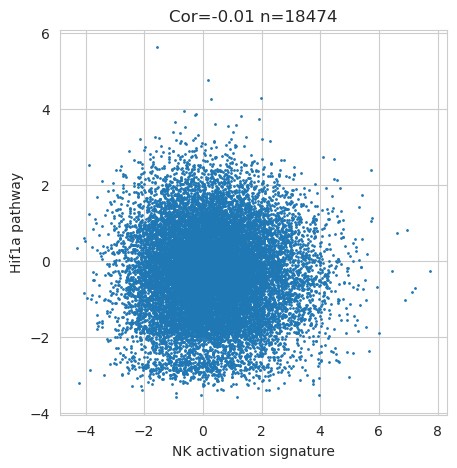

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy.stats import pearsonr

celltype = 'NK'
dataset = 'NPC_GSE162025'
sample = ''

signature = 'Hif1a_signature'
signaling_path = f'/sibcb1/bioinformatics/hongyuyang/dataset/Tres/2.tisch_data/3-4.NK_response/{dataset}.csv'
response_path = f'/sibcb1/bioinformatics/hongyuyang/dataset/Tres/2.tisch_data/3-4-2.Hif1a_response/{dataset}.csv'

signaling_data = pd.read_csv(signaling_path, delimiter='\t', index_col=0, header=0)
celltype_list = [v.split('.')[0] for v in signaling_data.columns]
celltype_flag = [v for v in signaling_data.columns if v.split('.')[0] == celltype]
signaling_data = signaling_data[celltype_flag]
response_data = pd.read_csv(response_path, delimiter='\t', index_col=0, header=0)

if sample != '':
    sample_flag = [v for v in response_data.columns if '.'.join(v.split('.')[:2]) == sample]
    signaling_data = signaling_data[sample_flag]
    sample_flag = [v for v in signaling_data.columns if '.'.join(v.split('.')[:2]) == sample]
    response_data = response_data[sample_flag]

fig = plt.figure(figsize=(5, 5))
ncols, nrows = 1, 1
gs = gridspec.GridSpec(nrows=nrows, ncols=ncols, width_ratios=[1] * ncols, height_ratios=[1] * nrows)

y = response_data.loc[signature]
col = 0
row = 0
ax = fig.add_subplot(gs[row, col])

x = signaling_data.loc['NK_signature']
correlation, _ = pearsonr(x, y)
    
ax.scatter(x, y, s=1)
ax.set_xlabel('NK activation signature')
ax.set_ylabel('Hif1a pathway')
ax.set_title(f'Cor={round(correlation, 2)} n={len(x)}')

# fig.suptitle(f"NFkB-NK Correlation ({sample})", fontsize=20, fontweight='bold', y=0.9)
plt.show()


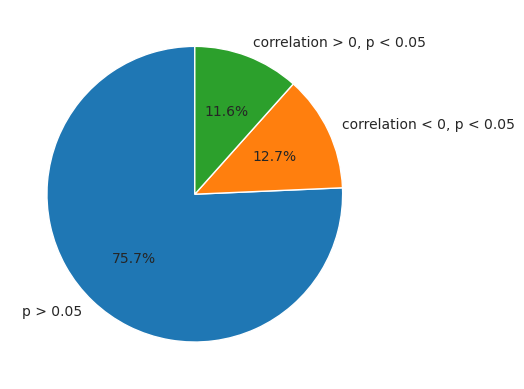

In [118]:
data_path = '/sibcb1/bioinformatics/hongyuyang/dataset/Tres/2.tisch_data/4.qc_result/qc_result_correlation.Hif1a.csv'
data = pd.read_csv(data_path, delimiter='\t', index_col=0, header=0).dropna()

# correlation = data[data['p'] < 0.05]['correlation']
# correlation = np.nan_to_num(data['correlation'], nan=0.0, copy=True)
def get_group(x):
    if x.correlation >= 0 and x.p <= 0.05:
        return f"correlation > 0, p < 0.05"
    elif x.correlation <= 0 and x.p <= 0.05:
        return f"correlation < 0, p < 0.05"
    elif x.p > 0.05:
        return "p > 0.05"

data['group'] = data.apply(lambda x: get_group(x), axis=1)
value_counts  = pd.DataFrame(data['group'].value_counts())

# 绘制饼图
plt.pie(value_counts['count'], labels=value_counts.index, autopct='%1.1f%%', startangle=90)

# 绘制箱线图
# plt.boxplot(correlation)
# plt.title("Correlation(p<0.05)")
# 显示图形
plt.show()

In [119]:
value_counts

,count
group,
p > 0.05,137
"correlation < 0, p < 0.05",23
"correlation > 0, p < 0.05",21
